# Prostate Cancer Project
# Metastasis Prediction Using mRNA Expression Data 
# Preprocessing Step

## Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

## Import Function

In [2]:
def read_object(obj_path):
    with open(obj_path, 'rb') as input:
        return pickle.load(input)

def save_object(obj, dir_path, file_name, file_extension='pkl', create_dir=True):
    if create_dir:
        if not os.path.isdir(dir_path):
            os.makedirs(dir_path)
    name = os.path.normpath(os.path.join(dir_path, file_name+'.'+file_extension))
    with open(name, 'wb') as output:  # overwrites any existing file
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)
        return name

## Loading Data and Preparing Data Matrix and Target Vector

In [ ]:
dir_path = 'D:/VSCodes (Saeed)/Prostate Cancer Project (Metastasis Status)(mRNA)/Reading_Step/'
file_name = 'Samples.pkl'
samples = read_object(dir_path + file_name)

file_name = 'mRNA ID.pkl'
mRNA_id = read_object(dir_path + file_name)

In [4]:
len(mRNA_id)

1411399

In [5]:
len(samples)

545

In [6]:
samples[0]

{'first_id': 'GSM1134064',
 'second_id': 'GBX.DISC.PCA1.CEL',
 'metastasis status': array(1, dtype=int8),
 'gleason score': array(7, dtype=int8),
 'mRNA values': array([6.44406927, 4.75344158, 7.94219843, ..., 8.10055912, 9.48165995,
        1.70632135], shape=(1411399,))}

In [7]:
samples_num = len(samples)
features_num = len(mRNA_id)
data_matrix = np.zeros((samples_num, features_num))
target_vector = np.zeros(samples_num)
for i in range(samples_num):
    data_matrix[i,:] = samples[i]['mRNA values']
    target_vector[i] = samples[i]['metastasis status']

In [8]:
data_matrix.shape

(545, 1411399)

In [9]:
target_vector.shape

(545,)

In [10]:
target_vector

array([1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 1., 1.

In [11]:
data_matrix

array([[6.44406927, 4.75344158, 7.94219843, ..., 8.10055912, 9.48165995,
        1.70632135],
       [6.54554656, 5.4918034 , 8.20749109, ..., 8.24623098, 9.8472008 ,
        1.83978001],
       [6.70337084, 6.10257107, 7.98643444, ..., 8.1935913 , 9.60824753,
        1.84618725],
       ...,
       [6.47783647, 5.65044129, 8.10425883, ..., 8.07852851, 9.46478795,
        1.83154075],
       [6.78200529, 6.2041918 , 8.13017589, ..., 8.2696326 , 9.52262192,
        1.79262447],
       [7.11694915, 4.95986329, 7.51289499, ..., 8.41310875, 9.41561555,
        2.3096911 ]], shape=(545, 1411399))

## Cross-Validation
## Hold-out (Training set: 80%, Test set: 20%)

In [12]:
train_matrix, test_matrix, train_target, test_target = train_test_split(data_matrix, target_vector, test_size=0.2)
print(train_matrix.shape)
print(train_target.shape)
print(test_matrix.shape)
print(test_target.shape)

(436, 1411399)
(436,)
(109, 1411399)
(109,)


## Normalization 
## Min-Max

In [14]:
scaler = MinMaxScaler()
scaler.fit(train_matrix)
normal_train_matrix = scaler.transform(train_matrix)
normal_test_matrix = scaler.transform(test_matrix)

## PCA and Visualization

In [15]:
pca = PCA(n_components=2)
pca.fit(normal_train_matrix)
train_pca_matrix = pca.transform(normal_train_matrix)
test_pca_matrix = pca.transform(normal_test_matrix)
print(train_pca_matrix.shape)
print(test_pca_matrix.shape)

(436, 2)
(109, 2)


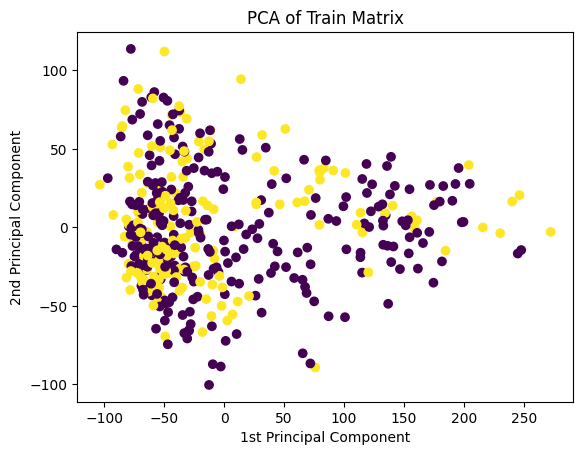

In [17]:
plt.Figure(figsize=(10,10))
fig = plt.scatter(train_pca_matrix[:,0], train_pca_matrix[:,1], c=train_target)
plt.title('PCA of Train Matrix')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.show()

## Classifying based on the PCA Data Matrix

In [27]:
n_components = 300
pca = PCA(n_components=n_components)
pca.fit(normal_train_matrix)
train_pca_matrix = pca.transform(normal_train_matrix)
test_pca_matrix = pca.transform(normal_test_matrix)
print(train_pca_matrix.shape)
print(test_pca_matrix.shape)

(436, 300)
(109, 300)


--------------------------------------------------
Training set
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94       270
         1.0       0.92      0.88      0.90       166

    accuracy                           0.93       436
   macro avg       0.93      0.92      0.92       436
weighted avg       0.93      0.93      0.93       436



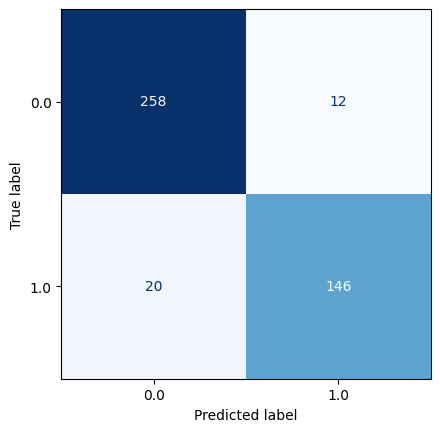

--------------------------------------------------
Test set
              precision    recall  f1-score   support

         0.0       0.66      0.90      0.77        63
         1.0       0.74      0.37      0.49        46

    accuracy                           0.68       109
   macro avg       0.70      0.64      0.63       109
weighted avg       0.70      0.68      0.65       109



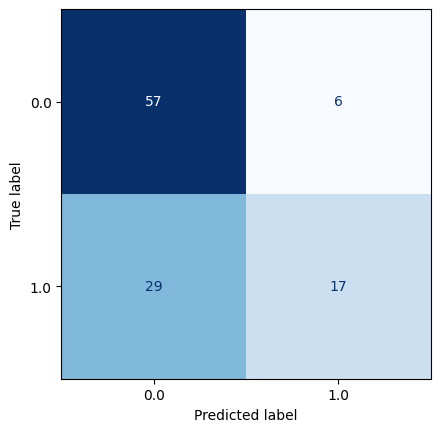

In [42]:
model = LinearDiscriminantAnalysis()
# model = QuadraticDiscriminantAnalysis()
# model = GaussianNB()
model.fit(train_pca_matrix, train_target)
train_pred = model.predict(train_pca_matrix)
test_pred = model.predict(test_pca_matrix)
print('-'*50)
print('Training set')
print(classification_report(train_target, train_pred))

ConfusionMatrixDisplay.from_predictions(train_target, train_pred, cmap='Blues', colorbar=False)
plt.show()

print('-'*50)
print('Test set')
print(classification_report(test_target, test_pred))
ConfusionMatrixDisplay.from_predictions(test_target, test_pred, cmap='Blues', colorbar=False)
plt.show()

## Saving Result

In [ ]:
dir_path = 'D:/VSCodes (Saeed)/Prostate Cancer Project (Metastasis Status)(mRNA)/Preprocessing_Step/'
file_name = 'Train Matrix'
save_object(train_matrix, dir_path, file_name)

file_name = 'Test Matrix'
save_object(test_matrix, dir_path, file_name)

file_name = 'Train Target'
save_object(train_target, dir_path, file_name)

file_name = 'Test Target'
save_object(test_target, dir_path, file_name)

'D:\\VSCodes_Saeed\\Prostate Cancer Project (Metastasis Status)(mRNA)\\Preprocessing_Step\\Test Target.pkl'